# データを取得する

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

boston = load_boston()

# 取得データをDataFrameにする

In [43]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [44]:
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=pd.DataFrame(boston.target[:],columns=['MEDV'])

# データ探索

- 一変数の可視化 - 生データセットの各フィールドの要約統計情報を提供
- 二変数の可視化 - データセット内の各変数と目的の目標変数との関係を見つけるために実行されます
- 多変数の可視化 - データセット内の異なるフィールド間の相互作用を理解するために実行されます
- 次元削除 - データの次元数を減らし、人間が理解できる次元で可視化を行う、または次元を圧縮することで高速に計算を行う

# 基本的なデータ探索

## 基本的なデータ探索について記述せよ
以下の観点をすべて含めて記述しましょう。

- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)

このデータセットはUCI Machine Learning Repositoryのプロジェクトに由来する。
ボストンの物件の価格にその物件の人口統計に関する情報で、データは1978年に収集され、506件のエントリーがボストンの様々な郊外の住宅を14つの属性で示している。

>The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 
[[参考](http://www.ritchieng.com/machine-learning-project-boston-home-prices/)]

- それぞれのカラムは何を表しているのか

 - CRIM・・・犯罪発生率（人口単位）
 - ZN・・・25,000平方フィート以上の住宅区画の割合
 - INDUS・・・非小売業の土地面積の割合（人口単位）
 - CHAS・・・チャールズ川沿いかどうか（1:Yes、0:No）
 - NOX・・・窒素酸化物の濃度（pphm単位）
 - RM・・・1戸あたりの平均部屋数
 - AGE・・・1940年よりも前に建てられた家屋の割合
 - DIS・・・ボストンの主な5つの雇用圏までの重み付きの郷里
 - RAD・・・幹線道路へのアクセス指数
 - TAX・・・10,000ドルあたりの所得税率
 - PTRATIO・・・教師あたりの生徒の数（人口単位）
 - B・・・アフリカ系アメリカ人居住者の割合（人口単位）
 - LSTAT・・・低所得者の割合


- メモ

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per \$10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

[[参考1](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)]
[[参考2](http://blog.pepese.com/entry/2016/09/04/144452)]

# 一変数の可視化
## describeメソッドを使用することで、全体のカウント、平均、標準偏差、最小値、最大値などを把握する

In [4]:
# 欠損値確認
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# データ型確認
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


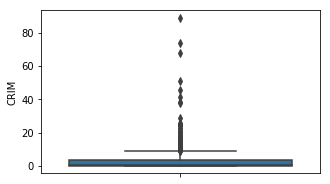

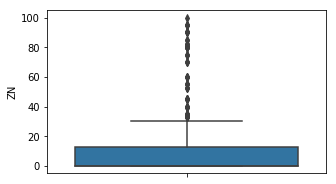

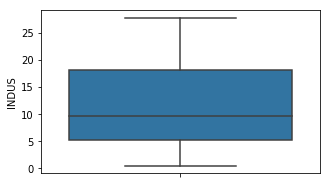

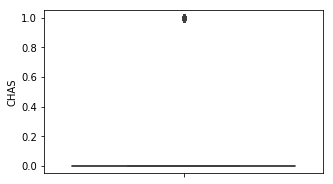

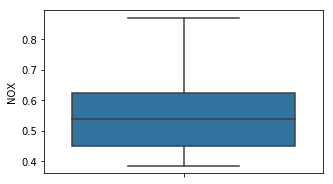

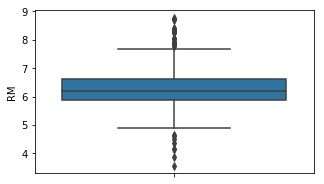

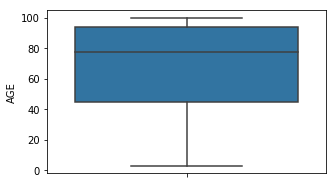

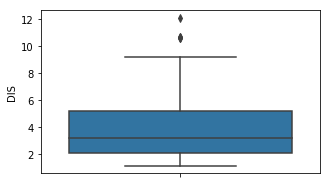

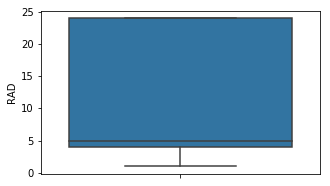

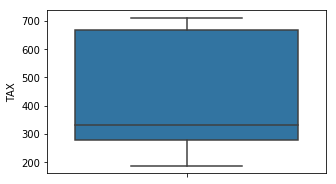

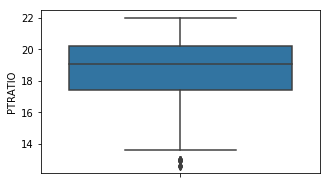

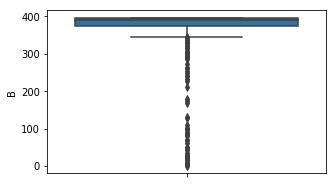

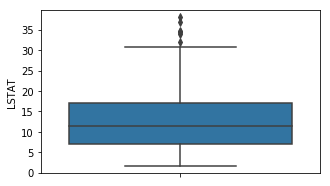

In [46]:
for column in X.columns:
    fig = plt.figure(figsize=(5,3))
    ax = sns.boxplot(y=column, data=X)

In [47]:
X['CHAS'].quantile([float(0.1 * x) for x in range(1,11)])

0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    0.0
1.0    1.0
Name: CHAS, dtype: float64

- 前処理に関して気をつけるべき点
    - データの中でCHASが極めて小さく、TAXが極めて大きい数値をとっているため、正規化または標準化が必要かもしれない。
    - boxplotからCHAS,CRIM, ZN, Bに外れ値がありそう。
- 機械学習の手法選択に活かせること
    - CHASは名義尺度。
- 機械学習の特徴選択について考えられること
    - 相関係数等を見てから検討


* * *
# [20171105 追記]

__(コメント)__

決定木に関しては正規化や標準化は必要なんでしたっけ？理解されているなら問題ないです。

__(追加確認内容)__

決定木では、データのスケールに対して不変のため特徴量の正規化や標準化は必要なかったです。決定木のモデルを前提にせず、単純に数値を見た際に考察した内容を記載していました。

* * * 

__(コメント)__

相関係数を表示させれば確かに、特徴量同士の重要度がわかり特徴量選択に役立ちますが、describeメソッドを用いたからこそ言えることはなんでしょう？

__(追加確認内容)__

- 欠損値の有無。多すぎる場合は特徴量の対象から外す可能性あり。
- 四分位数からデータの分散を確認。分散が小さい場合はデータに差異がないため、特徴量の対象から外す可能性あり。

* * * 

# 二変数の可視化

## 二変数の可視化　相関

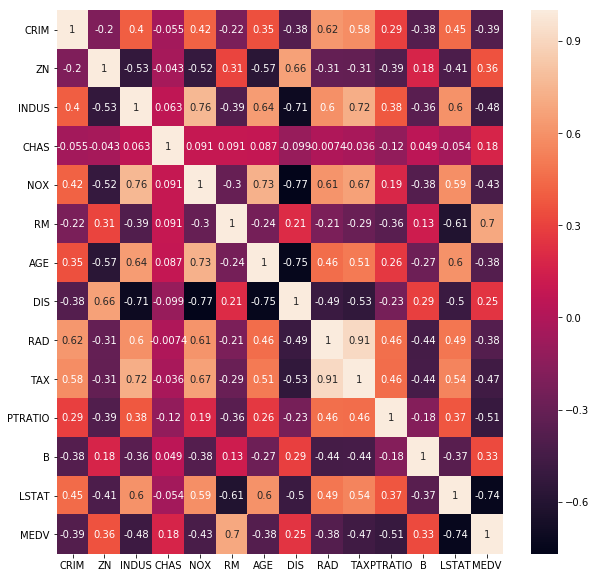

In [9]:
import seaborn
plt.figure(figsize=(10,10))
seaborn.heatmap(pd.concat([X,y],axis=1).corr(), annot=True)

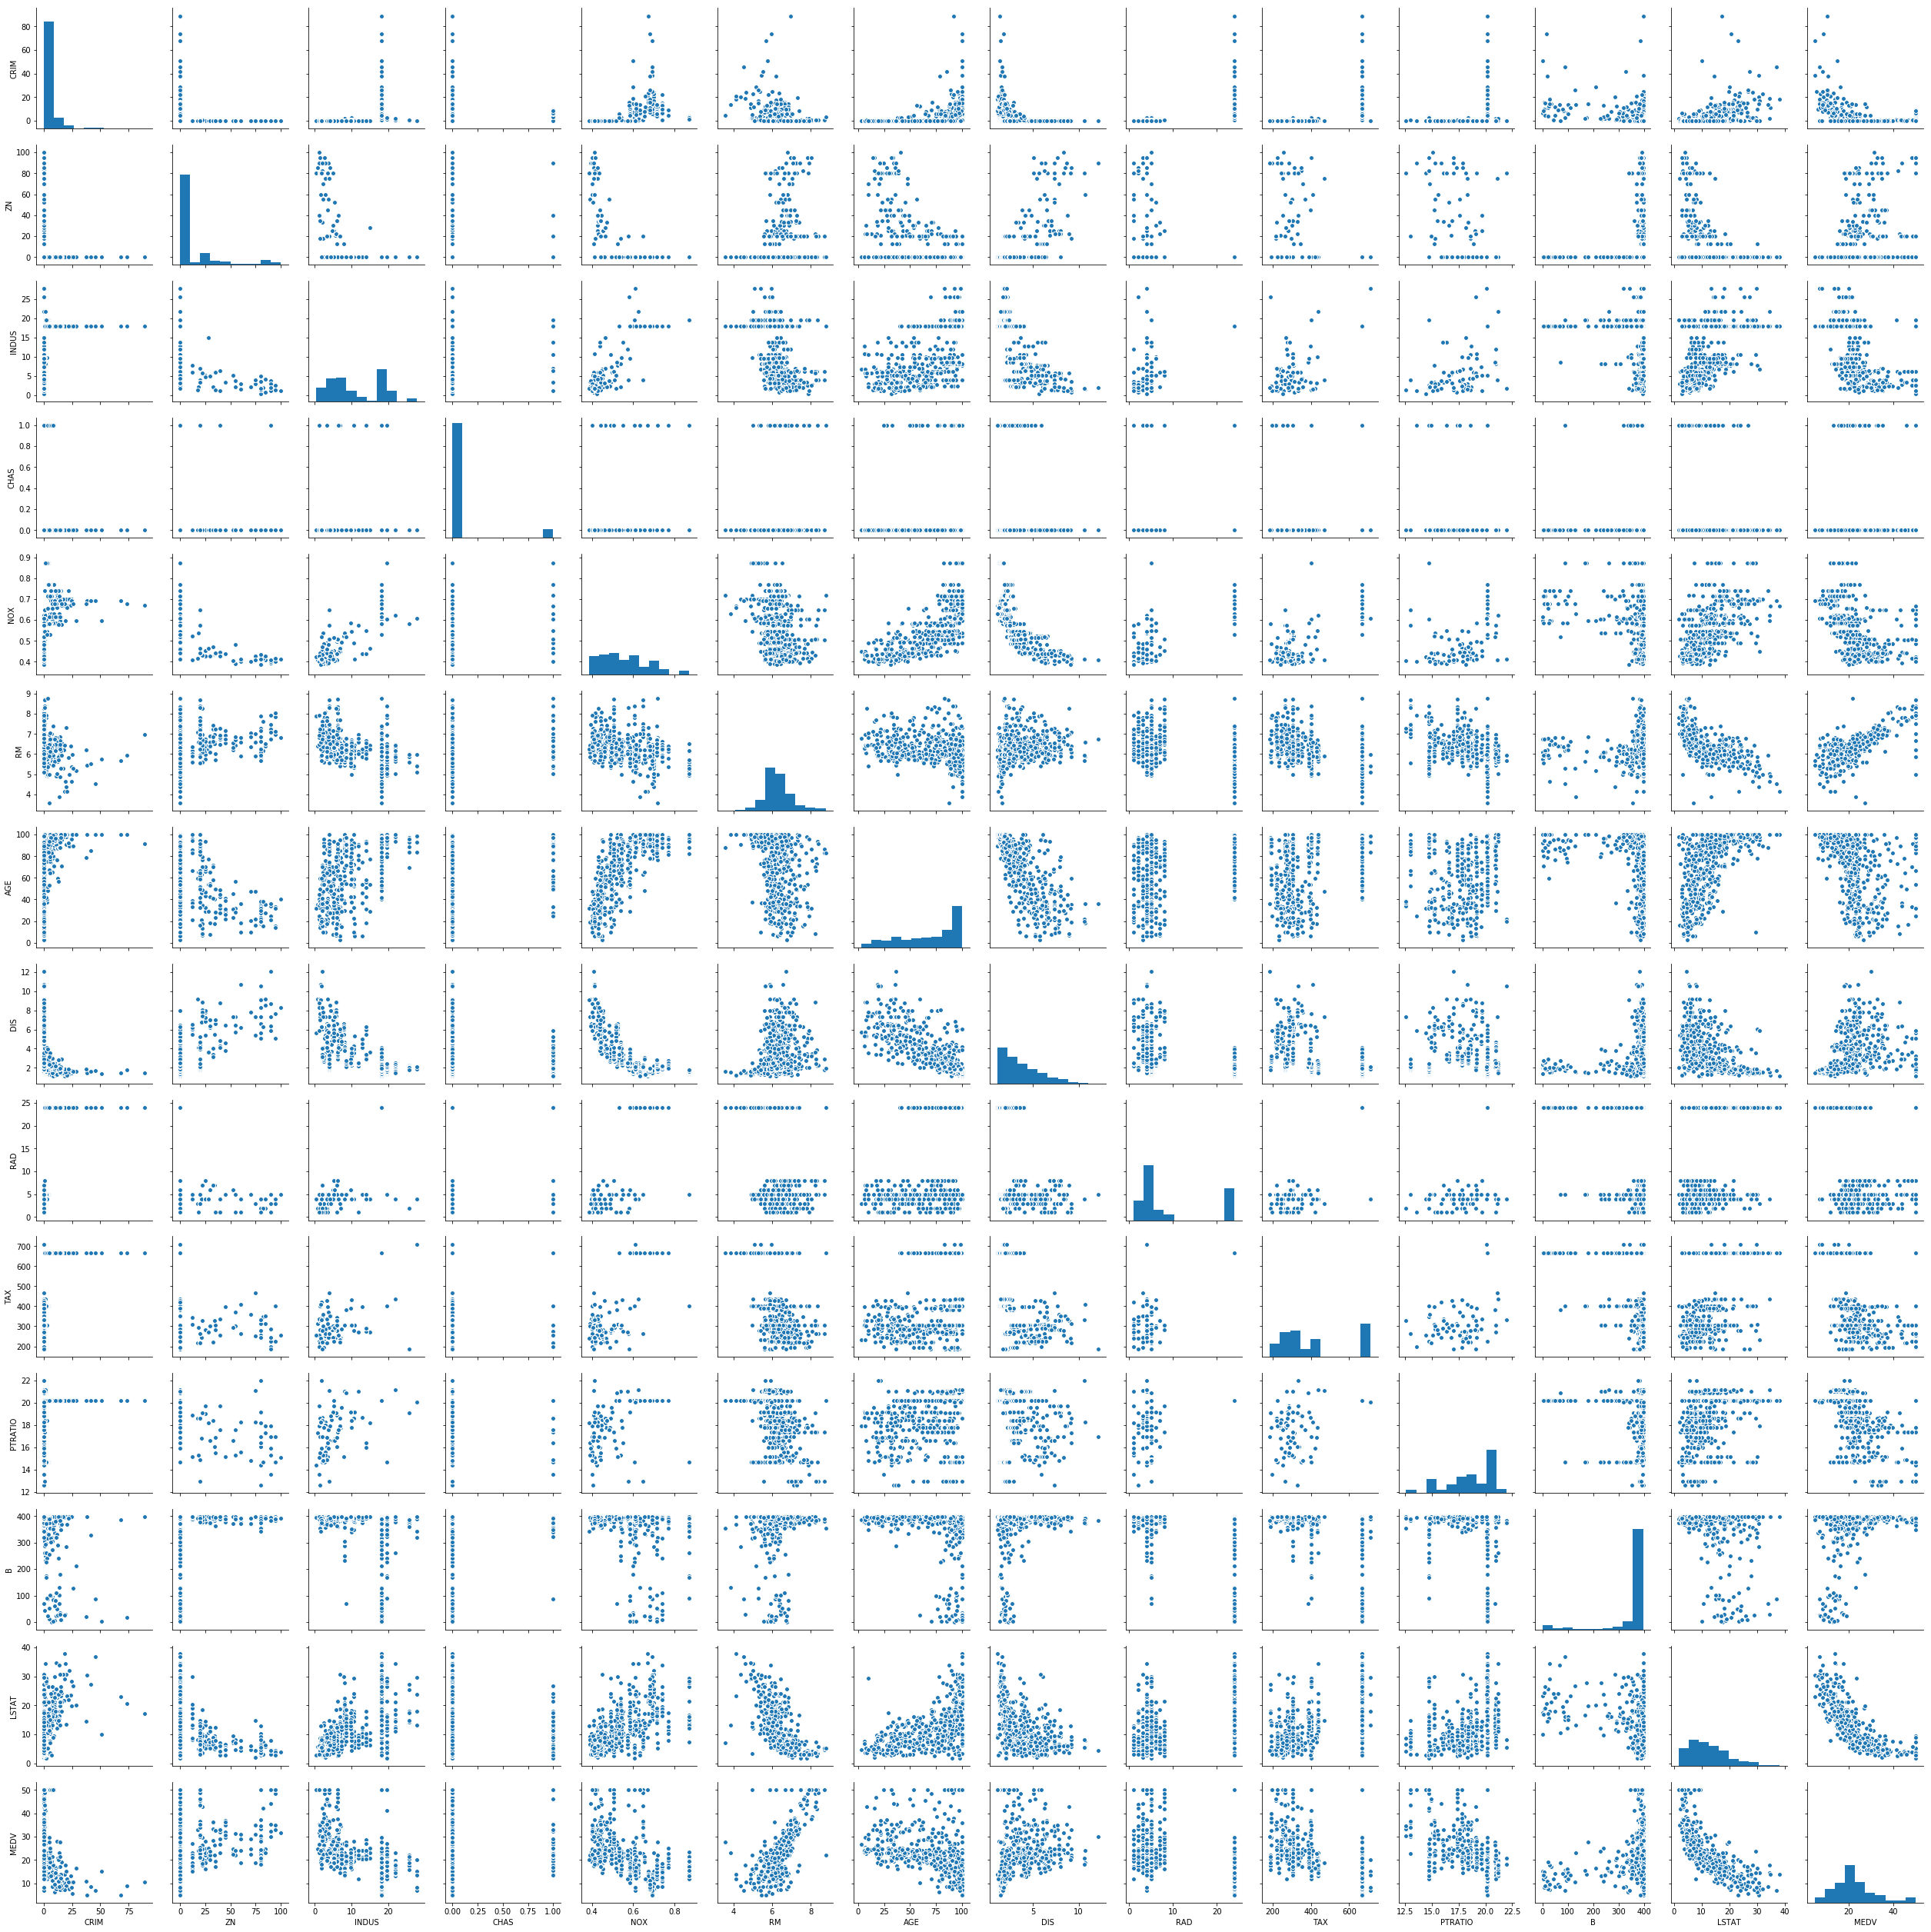

In [10]:
import seaborn as sns

sns.pairplot(pd.concat([X,y],axis=1))
plt.show()

## 二変数の可視化について記述せよ　相関
- そもそも相関とは何か

相関とは二つの変数XとYの間の結びつきの強さを表す指標。

- MEDVにもっとも相関があると出力された変数を3つほどあげよ
    - 正の相関
     - RM 0.7

    - 負の相関
     - LSTAT -0.74
     - PTRATIO -0.51


- 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）

求めたい特徴量（住宅価格）の変化に影響する能性のある特徴量を特定する。
相関は、どちらの変数が原因でどちらの変数が結果かが仮説化されてない場合での分析に用いるもので、大まかな関係性を得ることができる。

   - RMは線形な相関がありそう。
   - LSTATは非線形な相関がありそう。
   - PTRATIOは評価できない。

また散布図からは外れ値や、線形非線形かという情報が得られる。



* * *
# [20171105 追記]

__(コメント)__

相関ということはペアなはずです。何に対してでしょう？

__(追加確認内容)__

- MEDVとRMは線形な相関がありそう。
- MEDVとLSTATは非線形な相関がありそう。

* * * 

## 相関の注意点について記述せよ
- 便利な相関であるが、落とし穴がある。相関が正しく2変数の関係を表していない時がある、それはどのような場合か。その場合、どのような手段によって、確認するべきか

- 疑似相関によって２変数に関係があるように見えるケースがある。これはそれら２変数が共通に相関をもつ変数がある場合に発生する。（例：算数能力と身長。背後には年齢というそれぞれに共通する相関係数が高い変数がある。[[REF3](http://d.hatena.ne.jp/hoxo_m/20130711/p1)]、[[REF](https://www.slideshare.net/TerukiShinohara/ss-24471453)]）

- 多変量解析では、項目間の影響を排除した偏回帰係数を使うことで、より正確に項目ごとの影響度が量れる。([[REF2](http://blog.amedama.jp/entry/2017/06/20/215816)][[REF](http://tjo.hatenablog.com/entry/2013/08/15/001338#fn1)])

- その他気をつけること。（[[REF](http://koumurayama.com/koujapanese/correlation.htm)]）
 - 選抜効果（選抜を通して等質化した集団で相関をとると、相関係数は非常に低くなる。）
 - 相関係数の希薄化（信頼性の低い項目間で相関をとると、真の値の相関係数よりも低い値が生じてしまう）


# 二変数の可視化　プロット

In [63]:
import seaborn as sns
df = pd.concat([X,y], axis=1)

In [64]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


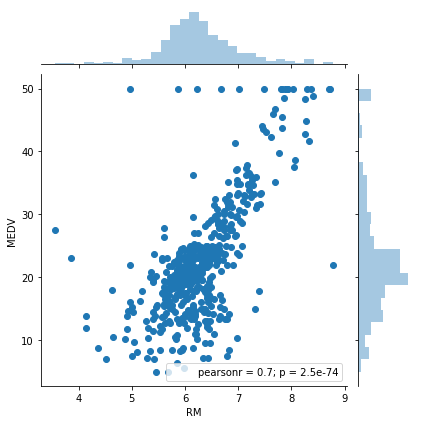

In [18]:
ax1 = sns.jointplot("RM", "MEDV", data=df)

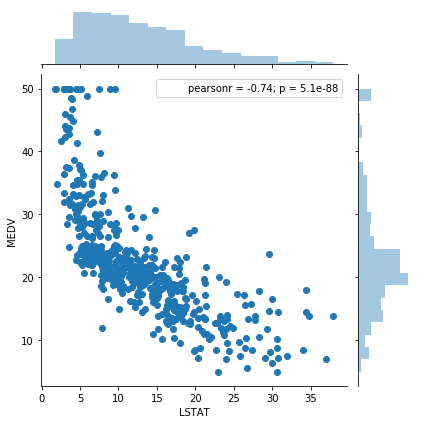

In [65]:
ax2 = sns.jointplot("LSTAT", "MEDV", data=df)

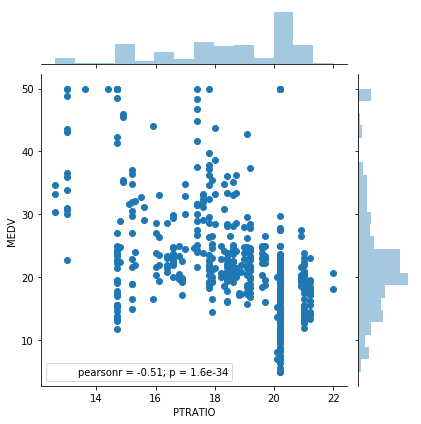

In [20]:
ax3 = sns.jointplot("PTRATIO", "MEDV", data=df)

# 二変数の可視化について記述せよ　プロット
それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。

- 正の相関
 - RM 0.7: グラフより傾き（45度程度）を見せているため、信用できる。

- 負の相関
 - LSTAT -0.74: グラフより傾き（45度程度）を見せているため、信用できる。
 - PTRATIO -0.51: もともと数値として高くないため、グラフに傾き（45度程度）がないため信用しない。


# 前処理
* * * 
今回は前処理を行う必要がないので、省略。

In [45]:
#X = X[["RM","LSTAT","PTRATIO"]]
#X = X[["RM","LSTAT"]]
#X = X[["LSTAT"]]
X = X[['RAD', 'RM', 'LSTAT', 'TAX', 'B', 'DIS']] 

### 欠損値の確認

In [10]:
X.isnull().any()

RM       False
LSTAT    False
dtype: bool

# データセット分割
* * *

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

random_state:
    
> random_state	乱数を制御するパラメータ。Noneにすると毎回違うデータが生成されが、整数をシードとして渡すと毎回同じデータが生成される。乱数オブジェクトを渡すことも可能。[[Ref](http://overlap.hatenablog.jp/entry/2015/10/08/022246)]

# 学習
* * *

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dep = [1,2,3]
tree_list = []

for di in dep:
    tree_ = DecisionTreeRegressor(max_depth = di)

    #決定係数を後で求める
    tree_list.append(tree_) 
    tree_.fit(X_train, y_train)

In [34]:
tree_.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

# 決定係数

In [13]:
for di, tree in enumerate(tree_list):

    print("LSTAT Depth{}".format(di+1))
    print('Train score: {}'.format(tree.score(X_train, y_train)))
    print('Test score: {}'.format(tree.score(X_test.values, y_test.values)))
    print("*"*30)

NameError: name 'tree_list' is not defined

# 学習曲線

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


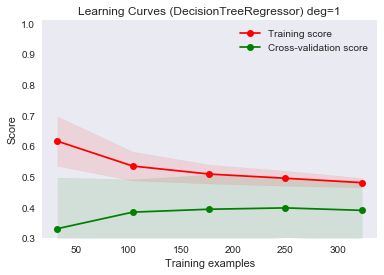

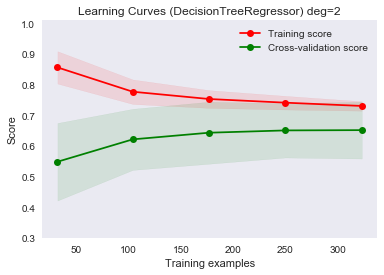

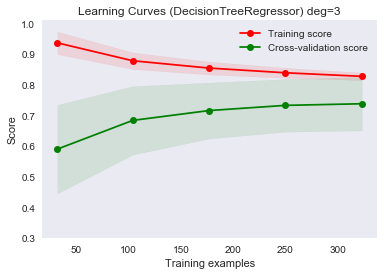

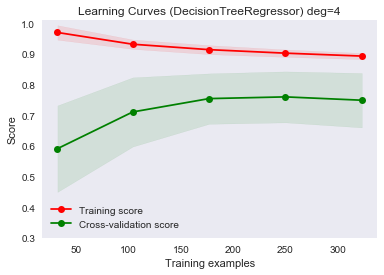

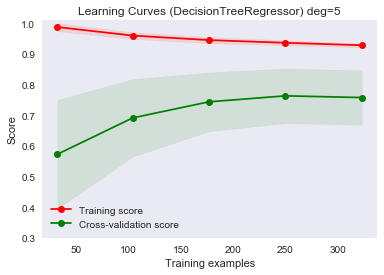

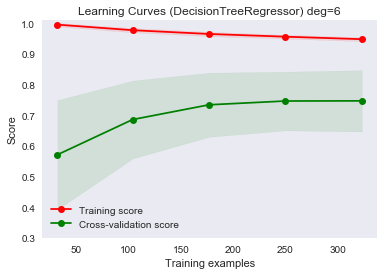

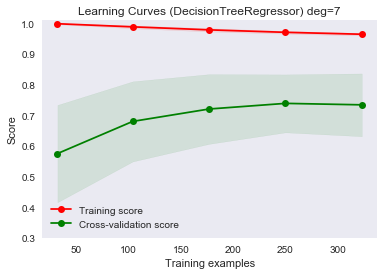

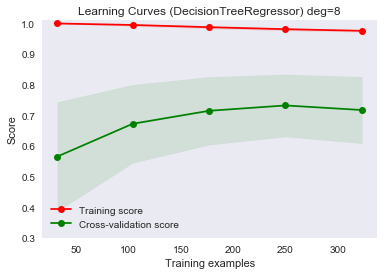

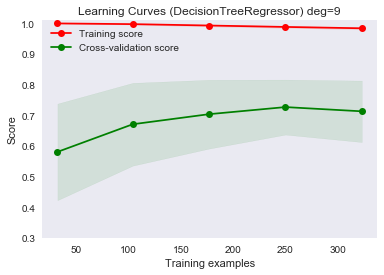

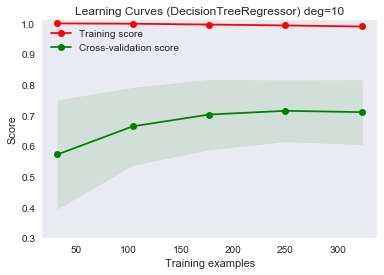

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor) deg={}"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

features = X_train
target = y_train

# ここで追加するfeaturesはtrain or all?
# 検証精度とは何か？
for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title.format(degree), features, target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

## 学習曲線について記述せよ
- High varianceとは何か
 - Varianceはアルゴリズムの良し悪しを決めるスペック。
 - Var高だと、過学習気味。汎化性能が低い。（モデルが複雑になると教師データに偏りがある場合に結果が偏る可能性がある。）

- High Biasとは何か
 - Biasは真のデータとモデルの結果データとのズレ。
 - Bias高だと、未学習気味。真のデータと結果が異なっている。（モデルが単純な場合は教師データに偏りがあっても引きずられる度合いは低いが、真のデータとモデルの結果データとはズレがある。）

- もっとも結果が良いと思われた深さをひとつ選択せよ
 - depth=2のケース。

- なぜその深さが最も良いか記述せよ
 - 高い検証精度で一番収束しているため。

- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ
 - ~多少は結果は良くなるが、すでにモデルが最適化された状態に近いためそれほど収束しない。~
 - __[20171105追記]__ 多少は結果は良くなるが、すでにモデルが最適化された状態に近いためこれ以上は収束しない。

# グリッドサーチ

In [8]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}

scoring_fnc=make_scorer(r2_score)

grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

NameError: name 'X_train' is not defined

__Kfoldの際のシャッフルを指定していないため、実行結果は異なると思いますが、4,5,6のいずれかが出力される可能性が高いです。__

> random_state パラメータのデフォルトは None です。つまり、 KFold(..., shuffle=True) が利用されるたびにシャッフルが異なることを意味します。__ただし、 GridSearchCV は、 fit メソッドの1回の呼び出しで検証される各パラメータセットに対して同じシャッフルを使用します。__ [[Ref](https://qiita.com/nazoking@github/items/13b167283590f512d99a)]


# [20171106追記]
[こちら](http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html)を参考にDecisionTreeRegressor()に書き換えて、再度グリッドサーチを実施し、パラメータを探索しました。

細かいプログラミングについては追って勉強します。

In [46]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [47]:
from time import time
from operator import itemgetter

def run_gridsearch(X, y, clf, param_grid, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [48]:
print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["mse", "friedman_mse", "mae"],
              "max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "max_leaf_nodes": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
              }

dt = DecisionTreeRegressor()
ts_gs = run_gridsearch(X, y, dt, param_grid, cv=10)

-- Grid Parameter Search via 10-fold CV


C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



GridSearchCV took 450.87 seconds for 3300 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.323 (std: 0.463)
Parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.323 (std: 0.463)
Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.323 (std: 0.463)
Parameters: {'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}



In [78]:
print("\n-- Best Parameters:")
for k, v in ts_gs.items():
    print("parameter: {:<20s} setting: {}".format(k, v))


-- Best Parameters:
parameter: criterion            setting: mse
parameter: max_depth            setting: 4
parameter: max_leaf_nodes       setting: 20
parameter: min_samples_leaf     setting: 7


In [90]:
dt = DecisionTreeRegressor()
ts_gs = run_gridsearch(X, y, dt, param_grid, cv=5)


GridSearchCV took 124.97 seconds for 3300 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.469 (std: 0.179)
Parameters: {'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': 8, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.469 (std: 0.179)
Parameters: {'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.469 (std: 0.179)
Parameters: {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 10}



C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# グリッドサーチについて記述せよ
- グリッドサーチとは何か
網羅的に最適なハイパーパラメータの値の最適な組み合わせを見つけ出す手法。モデルの性能の改善に役立つ。

- グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ

 - ランダムサーチ:指定した範囲の標本分布からランダムなパラメータの組み合わせるという手法のためグリッドサーチよりも計算量は少ない
 - ベイズ最適化 (Bayesian Optimization) :
    > 無作為にパラメータを抽出して探索します。 グリッドサーチよりも計算時間が短くて済むというメリットがあります。 [[Ref](http://futurismo.biz/archives/6445)]
    
- その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか

ランダムサーチ、ベイズ最適化は計算コストの点で優れている。ハイパーパラメータが多いときはランダムサーチを選択すべき。[[Ref2](https://www.quora.com/What-is-the-difference-between-random-search-and-grid-search-for-hyperparameter-optimization)]

# グリッドサーチを使いこなそう
- グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、

In [44]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


In [45]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 3}


- また結果を元にどの折りたたみ回数がベストなのか考察せよ
 - cv=3: max_depth=4
 - cv=5: max_depth= ~ 6
 - cv=10: max_depth= ~ 7
- グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ


In [46]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


In [47]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


In [48]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_squared_error', cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


'neg_mean_squared_error'に変更後、max_depth: ~8 が結果として出力。

# テスト
最後にテストデータを使用して、テストを行いましょう。グリッドサーチによって求めた深さの探索木で、学習を行い、最後に決定係数を求めます。(0.7以上の数値がでていれば合格です。)

__[20171105追記] random_stateを変更して決定係数が7割を越えていることを確認しています。__

## depth = 2

In [49]:
# depth = 2
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.7266887390898031
Test score: 0.5651861163410538


## depth = 4

In [51]:
# depth = 4
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [52]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8835598778300197
Test score: 0.5632885760466275


## depth = 5

In [53]:
# depth = 5
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [54]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.9118501490016554
Test score: 0.6009002175959895


## depth = 6

In [55]:
# depth = 6
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [56]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.9316562393130287
Test score: 0.6184629964052026


## Parameters: {'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 5}

In [64]:
tree = DecisionTreeRegressor(criterion="mse", 
                             max_depth=4, 
                             max_leaf_nodes=None, 
                             min_samples_leaf=3)

tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [65]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8673779153661586
Test score: 0.6146267022892767


## {'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 4}

In [67]:
tree = DecisionTreeRegressor(criterion="mae", 
                             max_depth=6, 
                             max_leaf_nodes=None, 
                             min_samples_leaf=4)

tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [68]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8845532376800079
Test score: 0.6359855623850512


## Parameters: {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 7}

In [76]:
tree = DecisionTreeRegressor(criterion="mse", 
                             max_depth=4, 
                             max_leaf_nodes=20, 
                             min_samples_leaf=7)

tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=20, min_impurity_split=1e-07, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8496517457459726
Test score: 0.650249674924181


## Parameters: {'criterion': 'mae', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 5}

In [80]:
tree = DecisionTreeRegressor(criterion="mae", 
                             max_depth=None, 
                             max_leaf_nodes=20, 
                             min_samples_leaf=5)

tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8328526520529725
Test score: 0.6204098146715861


## Parameters: {'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}

In [91]:
tree = DecisionTreeRegressor(criterion="mse", 
                             max_depth=3, 
                             max_leaf_nodes=20, 
                             min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=20, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [92]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.7387032023156959
Test score: 0.5679299081001066


## Parameters: {'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': 8, 'min_samples_leaf': 10}

In [93]:
tree = DecisionTreeRegressor(criterion="mse", 
                             max_depth=None, 
                             max_leaf_nodes=8, 
                             min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=8, min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [94]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.7328377584956273
Test score: 0.5457238764985194


In [38]:
## RANSACアルゴリズム
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(DecisionTreeRegressor(),
                         max_trials = 300,
                         min_samples=50,
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                         residual_threshold=100.0,
                         random_state=0)

In [39]:
ransac.fit(X_train, y_train)

C:\Users\suzukiry\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


ValueError: No inliers found, possible cause is setting residual_threshold (100.0) too low.

## {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}

In [49]:
tree = DecisionTreeRegressor(criterion="friedman_mse", 
                             max_depth=8, 
                             max_leaf_nodes=20, 
                             min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
           max_features=None, max_leaf_nodes=20, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
print('Train score: {}'.format(tree.score(X_train, y_train)))
print('Test score: {}'.format(tree.score(X_test, y_test)))

Train score: 0.8460710130793424
Test score: 0.6541537605086026


# [20171106追記]
- GridSearchでハイパーパラメータの数を増やす→62%ほど（改善）
 - Parameters: {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 7}
- 特徴量をLSTAT, RM, PMRATIO → LSTAT, RMに減らす→65%ほど（改善）
 - Parameters: {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 7}
- 特徴量をLSTAT, RM → LSTATに減らす→54%(劣化)
 - Parameters: {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 7}


- 標準化/正規化
 - LSTAT、RMともそれほど大きい値ではないので回避。

- 外れ値
 - boxplotから外れ値がありそうに見えるので、RANSACアルゴリズムを試行。
  - 実行できず、一旦あきらめ。
  
- 正則化
 - 決定木なのでできない。
 

## 結果

criterion="mse", max_depth=5,max_leaf_nodes=None,min_samples_leaf=5のパラメータで、Testデータで86%の成果を得た。